### Histopathologic Cancer Detection: Getting the Data

This project uses Kaggle Histopathologic Cancer Dataset as part of an learning and assessment of the Image Processing Course for Data Engineers at Jacobs University, Bremen. The dataset is available in Kaggle's Website at the link: https://www.kaggle.com/competitions/histopathologic-cancer-detection/data 



### Extracting the Dataset

To extract the dataset, download the zip file from the link: https://www.kaggle.com/competitions/histopathologic-cancer-detection/data. The following python code will extract the dataset and perform basic file counts.

In [ ]:
# Extracting the zipped file
import zipfile
with zipfile.zipfile('histopathologic-cancer-detection.zip') as zip:
    zip.extractall('data')

The data folder will now have the following structure.

In [4]:
!tree -d data

data
├── test
└── train

3 directories


The following unix script returns the number of files at each directory from the data folder

In [8]:
!find data -type f | cut -d/ -f2 | sort -R | uniq -c

   1 sample_submission.csv
   1 train_labels.csv
220025 train
57458 test


### Visualizing the Dataset

The code below will generate a random sample of 4-6 images and uses matplotlib for visualization.

In [18]:
import os 
import numpy as np 
from PIL import Image, ImageDraw
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [19]:
# reading labels file and implementing sampling
labels = pd.read_csv('data/train_labels.csv')
samples = labels.sample(n=6, random_state=42)
samples

,id,label
107796,d293308913e4a40cebb809d986aa9add65a76bfa,0
11942,fcd55f03496afb4b11598d9c2231e86da318e723,1
163858,5c983c8f14afeffdb098b9f3cbb68488a802b957,0
184810,71bf03e8530348e57ec07d8ce2052f215390c997,0
150958,1533406000e26663c5fadac3bcc3e38285a45bb3,1
89400,2726c36d0f578b629de736fe08b2553606eb6909,1


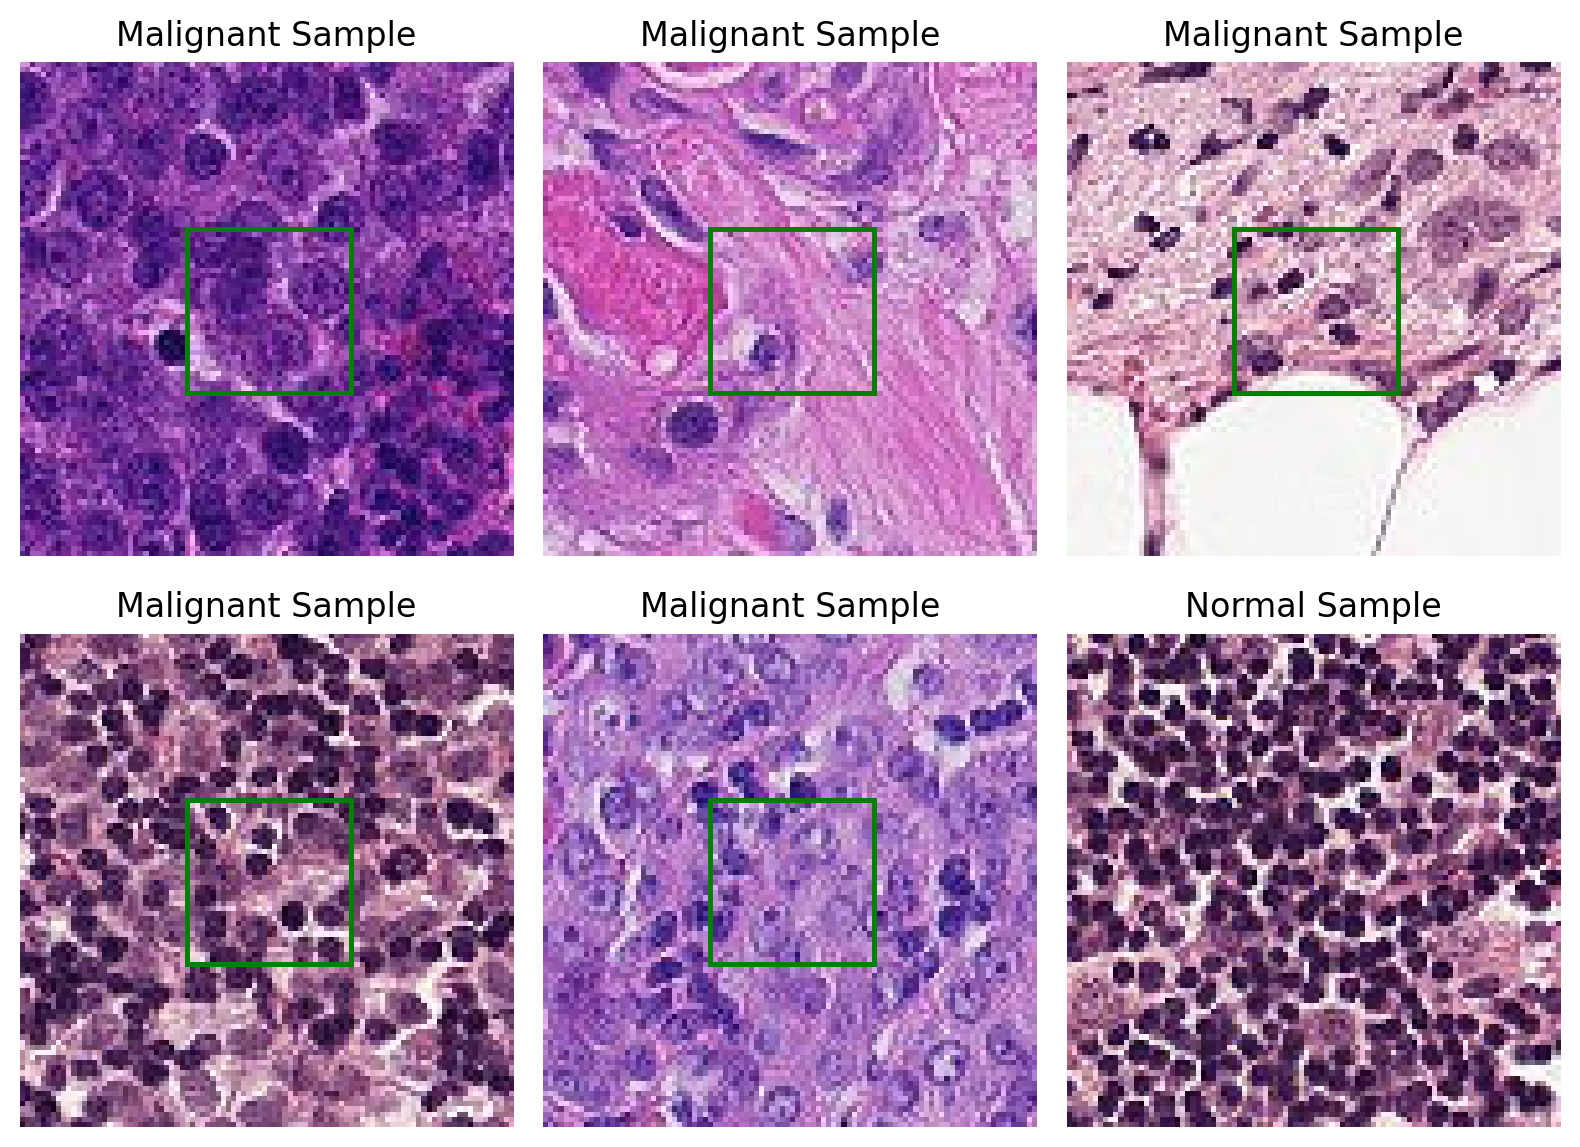

In [23]:
# randomize sample
samples = labels.sample(n=6)

fig, axes = plt.subplots(2, 3, figsize=(8,6))

for i, ax in enumerate(axes.reshape(-1)):
    file, label = samples[['id', 'label']].values[i]
    img = Image.open(os.path.join('data/train', file + '.tif'))

    if label == 1:
        draw = ImageDraw.Draw(img)
        draw.rectangle( ( (32, 32), (64, 64)), outline="green" )

        ax.imshow(np.array(img))
        ax.set_title('Malignant Sample') 
        ax.axis('off')

    else:
        ax.imshow(np.array(img))
        ax.set_title('Normal Sample')
        ax.axis('off')

plt.tight_layout()
plt.show()